# EDA Project: Data Scientists and the Stack Overflow Developer Survey

## Questions:
### Where are data scientists working and who are they working for? How career satisfied are data scientists?

## Hypothesis
### Most data scientists are located in the United States, China and Europe. Data scientists are distributed across a wide variety of industries including public and private companies, government, non-profits and research institutions. Data scientists are highly satisfied with their career and job, however, the level of satisfaction depends on the employer type, level of education, job flexibility and pay. It is likely that career satisfaction depends on many other factors that are not included in the Stack Overflow Developers survey.

## Assumptions
### The respondents to the Stack Overflow Developer Survey are representative of the population of data scientists and developers as a whole


## Approach

### I examined data from the 2017 Stack Overflow developer survey. The data contained responses from over 50,000 Stack Overflow users to questions on an extensive range of topics. Survey respondents included many types of Stack Overflow users such as web developers, mobile app developers, embedded applications developers and data scientists. Since I am interested in the career satisfaction, job placement and location and of data scientists, I started by narrowing the dataset to focus on related categories. These categories included country, employment status, company size, company type, career satisfaction, and job satisfaction. I also included several additional columns not directly related to the question but that may impact job satisfaction such as: education level, salary and college/university major. The dataset initialy contained 154 columns (survey questions) which I reduced to 10. I made sure that the data was tidy - this didn't require much work as the data came in tidy form for my purposes. I cleaned the data as described below. 

### My approach to the analysis began by summarizing the data using the pandas_profiling library and forming several additional questions about the data. I then made histograms and bar plots of the relevant variables - career satisfaction, job satisfaction, country and company type and size. I compared these plots to the general respondents in the Stack Overflow survey to see if the data scientists' responses were similar to the wider developer community. Finally, I compared several of the variables to see whether they had an impact on career and job satisfaction. I concluded this analysis by identifying questions and recommendations for further analysis.  

## Data and Data Cleaning

### Since my analysis is primarily interested in data scientists, I started by separating data scientists from non data scientists. After applying this filter, the data scientists data contained 1100 responses with 10 rows. I also excluded ambiguous answeres, such as "it's complicated", "prefer not to answer" or "I don't know" from much of my anlysis. I also transformed several of the categorical variables into integer ratings so that they could be more easily analyzed. 

## Key Findings
### Data scientists are highly career satisfied
### The countries with the most data scientists are the United States, Germany, the UK and India, however, data scientists come from all over. The majority of data scientists were not from one of the top 5 countries suggesting a high level of geographic distribution
### Most data scientists work for either a private company, government/university or a public company - in that order. 
### Most data scientists work in the office most of the time. Very few data scientists work remote full time or most of the time. 
### Education level and company size were identified as possible factors in career and job satisfaction levels, though greater statistical analysis is recommended. 

## Lessons Learned

### My python and pandas skills developed greatly while doing this exercise. I learned several tricks to making my code more efficient - for example - use of the series.str.contains() built-in pandas function. I learned how to use seaborn to make nicer looking plots and generally greatly improved my knowledge of data visualization in python. Finally, I learned how to make a geographic chloropleth (heat map) using Open Heatmap. 

## Further Analysis
#### Why are there no responses to Salary for data scientists? is this correct? 
#### How does salary affect career/job satisfaction?
#### How do satisfaction levels of data scientists compare to those in other careers?
#### I also recommend hypothesis testing whether company size and education level are correlated with job and career satisfaction levels.  

## Code information

In [209]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm
import math
import re

%matplotlib inline
pd.options.mode.chained_assignment = None # Turn off warnings

In [157]:
data = pd.read_csv('../data/survey_results_public.csv')

In [158]:
data.shape

(51392, 154)

In [159]:
narrow_data = data[['Professional', 'Country', 'FormalEducation', 'HomeRemote', 'CompanySize',
                    'CompanyType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'Salary']]
narrow_data.head()

,Professional,Country,FormalEducation,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,Salary
0,Student,United States,Secondary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Student,United Kingdom,Some college/university study without earning ...,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,NaN
2,Professional developer,United Kingdom,Bachelor's degree,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0,113750.0
3,Professional non-developer who sometimes write...,United States,Doctoral degree,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,NaN
4,Professional developer,Switzerland,Master's degree,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0,NaN


In [160]:
pandas_profiling.ProfileReport(narrow_data)

Number of variables,10
Number of observations,51392
Total Missing (%),26.7%
Total size in memory,3.9 MiB
Average record size in memory,80.0 B
Numeric,3
Categorical,7
Date,0
Text (Unique),0
Rejected,0
Distinct count,12


#### From this intial analysis we can immediately see that career satisfaction and job satisfaction are skewed to the right (high satisfaction); most respondents work for a private or public company; the USA, India and UK (in order) are the most common countries for respondents, however, majority of respondents come from another country; most developers hold a bachelor's degree, many also have a master's degree; most respondents either never work from home or work from home a few days each month.; most respondents are professional developers; the salary category has a lot of missing values (~75%) but is generally left-skewed. 

In [161]:
ds_data = narrow_data[narrow_data['NonDeveloperType'].str.contains('Data scientist', na=False)]
ds_data.head()

,Professional,Country,FormalEducation,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,Salary
3,Professional non-developer who sometimes write...,United States,Doctoral degree,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,NaN
6,Professional non-developer who sometimes write...,United States,Master's degree,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,Data scientist,7.0,6.0,NaN
528,Professional non-developer who sometimes write...,El Salvador,Some college/university study without earning ...,About half the time,10 to 19 employees,Publicly-traded corporation,Analyst or consultant; Data scientist,10.0,10.0,NaN
618,Professional non-developer who sometimes write...,United States,Some college/university study without earning ...,It's complicated,"1,000 to 4,999 employees","Privately-held limited company, not in startup...",Analyst or consultant; Data scientist; Designe...,9.0,7.0,NaN
658,Professional non-developer who sometimes write...,United States,Master's degree,A few days each month,"1,000 to 4,999 employees","Privately-held limited company, not in startup...",Analyst or consultant; Data scientist,8.0,9.0,NaN


In [162]:
pandas_profiling.ProfileReport(ds_data)

/Users/kathrynklarich1/anaconda/lib/python3.6/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}


Number of variables,11
Number of observations,1100
Total Missing (%),13.6%
Total size in memory,94.6 KiB
Average record size in memory,88.1 B
Numeric,3
Categorical,6
Date,0
Text (Unique),0
Rejected,2
Distinct count,12


#### Make a function to identify data scientists and non-data scientists. This will be useful later in our analysis for comparing characteristics across the two groups.

In [163]:
def find_ds(a_string):
    try:
        if re.search(r'Data scientist', a_string):
            return 1
        else:
            return 0
    except:
        return 0

In [164]:
narrow_data['DataScientist'] = narrow_data['NonDeveloperType'].apply(find_ds)
narrow_data.head()

,Professional,Country,FormalEducation,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,Salary,DataScientist
0,Student,United States,Secondary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Student,United Kingdom,Some college/university study without earning ...,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,NaN,0
2,Professional developer,United Kingdom,Bachelor's degree,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0,113750.0,0
3,Professional non-developer who sometimes write...,United States,Doctoral degree,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,NaN,1
4,Professional developer,Switzerland,Master's degree,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0,NaN,0


In [165]:
non_ds_data = narrow_data[narrow_data.DataScientist == 0]

#### From the first glance at the data scientists data we can see that there are 1100 data scientists; overall there is a low percentage of missing data, however, Salary has no responses - this seems a bit odd and should be explored later. Career and job satisfaction are right-skewed; compared to the general group of respondents, a much larger portion of data scientists appear to work for large companies (>10,000 employees); Most data scientists work in a privately held company or government/public school/university - this is also a bit different in comparison to the overall survey respondents. The most common countries for data scientists were the USA, Germany and UK (in that order), however, most data scientists came from a different country; most data scientists hold at least a bachelor's degree, many hold a master's or doctoral degree; most data scientists either workf from home a few days a month or never work from home. 

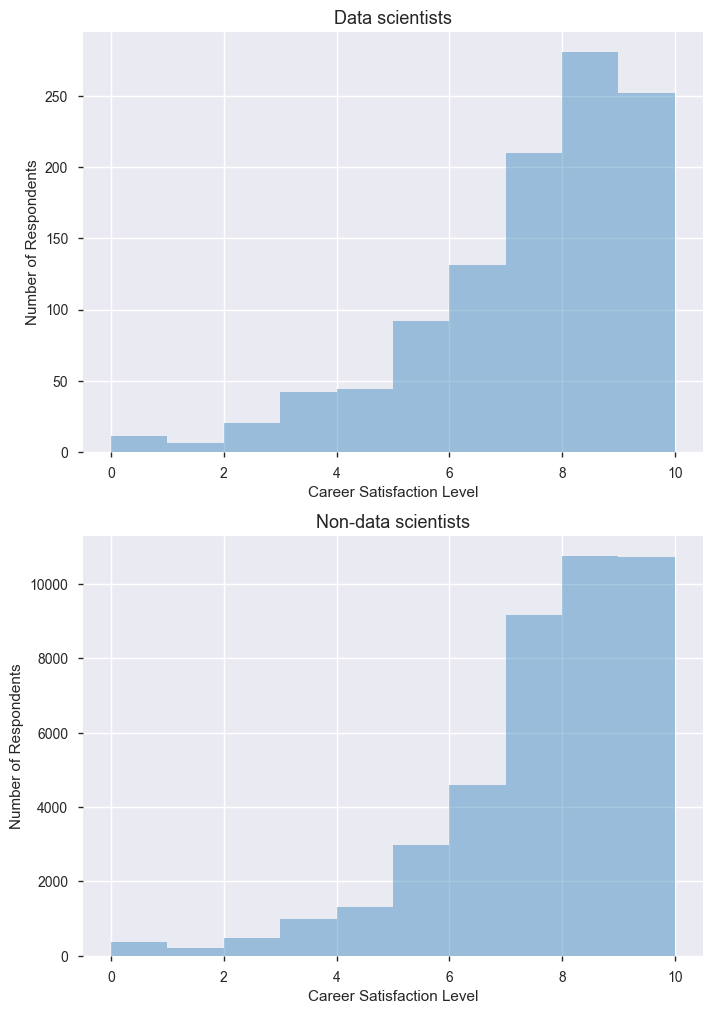

In [168]:
f, (ax1, ax2) = plt.subplots(2, sharex=False, figsize=(8,12))
sns.distplot(ds_data['CareerSatisfaction'].dropna(axis=0), ax=ax1, kde=False, bins=10, 
             axlabel='Career Satisfaction Level')
ax1.set_ylabel('Number of Respondents')
ax1.set_title('Data scientists', fontsize=13)

sns.distplot(non_ds_data['CareerSatisfaction'].dropna(axis=0), ax=ax2, kde=False, bins=10, 
             axlabel='Career Satisfaction Level')
ax2.set_ylabel('Number of Respondents')
ax2.set_title('Non-data scientists', fontsize=13)
ax2.set_xlabel('Career Satisfaction Level')

plt.show()

#### The satisfaction levels of data scientists and non data scientists seem to be about the same -- data scientists are no more or less satisfied with their career than other developers.

In [169]:
ds_countries = ds_data.groupby('Country')['Professional'].count().reset_index()
ds_countries.columns = ['Country', 'Number']
ds_countries = ds_countries.sort_values(['Number'], axis=0, ascending=False)

In [170]:
nonds_countries = non_ds_data.groupby('Country')['Professional'].count().reset_index()
nonds_countries.columns = ['Country', 'Number']
nonds_countries = nonds_countries.sort_values(['Number'], axis=0, ascending=False)

In [171]:
ds_countries = ds_countries[ds_countries.Number >= 10]
nonds_countries = nonds_countries[nonds_countries.Number >= 400]

In [172]:
ds_countries.head()

,Country,Number
94,United States,271
31,Germany,121
93,United Kingdom,92
39,India,52
18,Canada,38


In [173]:
nonds_countries.head()

,Country,Number
187,United States,11184
84,India,5145
186,United Kingdom,4303
69,Germany,4022
38,Canada,2195


In [174]:
x1 = list(ds_countries['Country'][:10])
x2 = list(nonds_countries['Country'][:10])

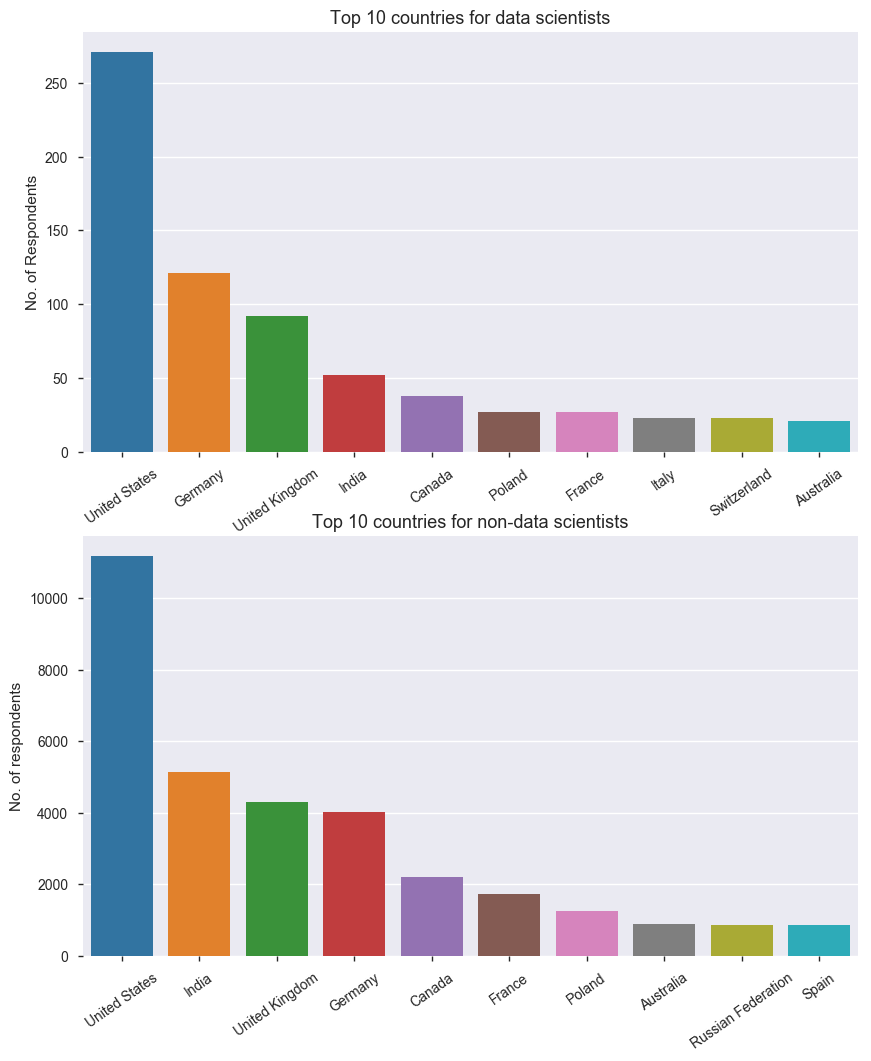

In [175]:
f, (ax1, ax2) = plt.subplots(2, figsize=(10, 12))

sns.set_color_codes('pastel')
ax1 = sns.barplot(x=ds_countries['Country'][:10], y=ds_countries['Number'][:10], ax=ax1)
ax1.set_title('Top 10 countries for data scientists', fontsize=13)
ax1.set_ylabel('No. of Respondents')
ax1.set_xlabel('')
ax1.set_xticklabels(x1, rotation=35)

ax2 = sns.barplot(x=nonds_countries['Country'][:10], y=nonds_countries['Number'][:10], ax=ax2)
ax2.set_title('Top 10 countries for non-data scientists', fontsize=13)
ax2.set_ylabel('No. of respondents')
ax2.set_xticklabels(x2, rotation=35)
ax2.set_xlabel('')

plt.show()

#### Data scientists seem to follow a similar geographic desitribution as non-data scientists - most of the top ten countries for data scientists are also in the top ten list of countries for non-data scientists. 

In [176]:
country_satisfcation = ds_data.groupby('Country')['CareerSatisfaction'].mean().reset_index()

In [177]:
top_countries = pd.merge(ds_countries, country_satisfcation, how='inner', on='Country')
top_countries.head()

,Country,Number,CareerSatisfaction
0,United States,271,7.429630
1,Germany,121,7.243697
2,United Kingdom,92,7.032967
3,India,52,6.450980
4,Canada,38,7.289474


In [21]:
country_satisfcation = top_countries[['Country', 'CareerSatisfaction']]
country_satisfcation.to_csv('CareerSatisfactionByCountry.csv')

#### A chloropleth (geographic heatmap) of data scientist career satisfaction levels by country seen [here](http://www.openheatmap.com/embed.html?map=UniequivalentHydrargyriaRenny) 

### Now let's examine remote working
#### The data will be much easier to work with if we can get it into numerical categories rather than strings. Start by assinging a numerical rating to each of the categories - a lower rating should indicate less frequent remote work while a higher rating will indicate more frequent remote work. 

In [178]:
ds_data['HomeRemote'].unique()

array(['Less than half the time, but at least one day each week',
       'About half the time', "It's complicated", 'A few days each month',
       'Never', "All or almost all the time (I'm full-time remote)", nan,
       'More than half, but not all, the time'], dtype=object)

#### There are seven unique categories not including no response. Most of the categories clearly indicate a remote work frequency, however, the category "It's Complicated" is ambiguous. Since we don't know what the respondent means by "It's complicated, we will get rid of those answers. The remaining six categories are assigned numbers 0 - 5 with 0 being never work remotely and 5 being full-time remote. 

In [179]:
work_from_home = {
                 'Never': 0, "All or almost all the time (I'm full-time remote)": 5, "About half the time": 3,
                 "It's complicated": '.', "Less than half the time, but at least one day each week": 2, 
                 "More than half, but not all, the time": 4, "A few days each month": 1, 
                  }
# drop the "it's complicated" responses since we have no way of knowing what the respondent means by that

#### Next I made a function that assigns one of the numerical ratings to each of the work from home categories in the "HomeRemote" column, and apply it to our narrow_data dataframe. 

In [180]:
def home_remote(key):
    '''takes a string and searcheds for it in the work_from_home dict. If it finds a match, it returns the value,
    else it returns none'''
    try:
        
        home_remote_code = work_from_home[key]
        return home_remote_code
    
    except:
        return '.'

In [181]:
narrow_data['HomeRemoteCode'] = narrow_data['HomeRemote'].apply(lambda x: home_remote(x))
home_remote_data = narrow_data[narrow_data.HomeRemoteCode != '.']
home_remote_data.head()

,Professional,Country,FormalEducation,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,Salary,DataScientist,HomeRemoteCode
1,Student,United Kingdom,Some college/university study without earning ...,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,NaN,0,4
2,Professional developer,United Kingdom,Bachelor's degree,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0,113750.0,0,2
3,Professional non-developer who sometimes write...,United States,Doctoral degree,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,NaN,1,2
4,Professional developer,Switzerland,Master's degree,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0,NaN,0,0
6,Professional non-developer who sometimes write...,United States,Master's degree,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,Data scientist,7.0,6.0,NaN,1,2


In [182]:
ds_data['HomeRemoteCode'] = ds_data['HomeRemote'].apply(lambda x: home_remote(x))
ds_home_remote_data = ds_data[ds_data.HomeRemoteCode != '.']
ds_home_remote_data.head()

,Professional,Country,FormalEducation,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,Salary,HomeRemoteCode
3,Professional non-developer who sometimes write...,United States,Doctoral degree,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,NaN,2
6,Professional non-developer who sometimes write...,United States,Master's degree,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,Data scientist,7.0,6.0,NaN,2
528,Professional non-developer who sometimes write...,El Salvador,Some college/university study without earning ...,About half the time,10 to 19 employees,Publicly-traded corporation,Analyst or consultant; Data scientist,10.0,10.0,NaN,3
658,Professional non-developer who sometimes write...,United States,Master's degree,A few days each month,"1,000 to 4,999 employees","Privately-held limited company, not in startup...",Analyst or consultant; Data scientist,8.0,9.0,NaN,1
766,Professional non-developer who sometimes write...,United States,Secondary school,Never,500 to 999 employees,"Privately-held limited company, not in startup...",Analyst or consultant; Data scientist,0.0,2.0,NaN,0


#### I want to compare job satisfaction to from working to see whether the work from home frequency impacts job satisfaction. I grouped each of the Home/Remote datasets by their work from home code and found the mean job satisfaction level.  

In [183]:
HR_means = home_remote_data.groupby('HomeRemoteCode')[['HomeRemoteCode', 'JobSatisfaction']].mean().reset_index()
HR_means

,HomeRemoteCode,JobSatisfaction
0,0,6.632502
1,1,7.077509
2,2,7.120125
3,3,6.973702
4,4,6.953184
5,5,7.388430


In [184]:
ds_HR_means = ds_home_remote_data.groupby('HomeRemoteCode')[['HomeRemoteCode', 'JobSatisfaction']].mean().reset_index()
#ds_HR_means['Code'] = list(range(6))
ds_HR_means

,HomeRemoteCode,JobSatisfaction
0,0,6.762264
1,1,7.062827
2,2,7.152174
3,3,6.906250
4,4,6.102041
5,5,6.536585


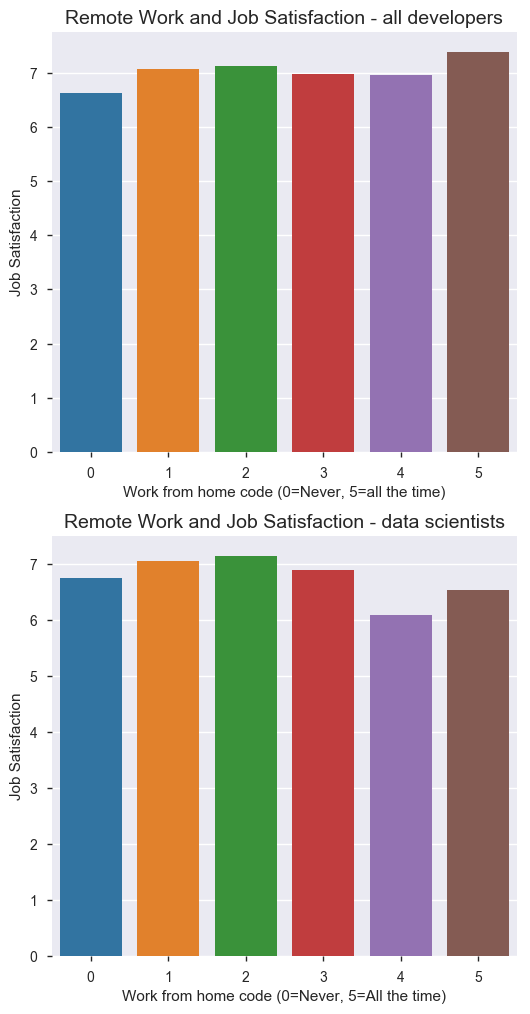

In [185]:
f, (ax1, ax2) = plt.subplots(2, figsize = (6, 12))
sns.set_color_codes('pastel')

sns.barplot(x=HR_means['HomeRemoteCode'], y=HR_means['JobSatisfaction'], ci=95, ax=ax1)
ax1.set_title('Remote Work and Job Satisfaction - all developers', fontsize=14)
ax1.set_ylabel('Job Satisfaction')
ax1.set_xlabel('Work from home code (0=Never, 5=all the time)')

sns.barplot(x=ds_HR_means['HomeRemoteCode'], y=ds_HR_means['JobSatisfaction'], ci=95, ax=ax2)
ax2.set_title('Remote Work and Job Satisfaction - data scientists', fontsize = 14)
ax2.set_ylabel('Job Satisfaction')
ax2.set_xlabel('Work from home code (0=Never, 5=All the time)')

plt.show()

# Why don't the confidence intervals show on chart?
# Why are the colors so weird?

#### There is little variability between different remote work categories. This could either indicate that the ability to work from home doesn't have much impact on job satisfaction, that there is little variability in the data overall and therefore hard to tease out the impact of any single variability on job satisfaction, or that people self-select where they will be most content working (based on personal preference) and therefore have about the same level of satisfaction because they are working from where they want to be working. Any of these options could be valid reasons but it is hard to tell from this data alone. 

#### We may want to know how many data scientists are working remotely sometimes, all the time or not at all. To answer this question I made a histogram of the work from home cateogries. 

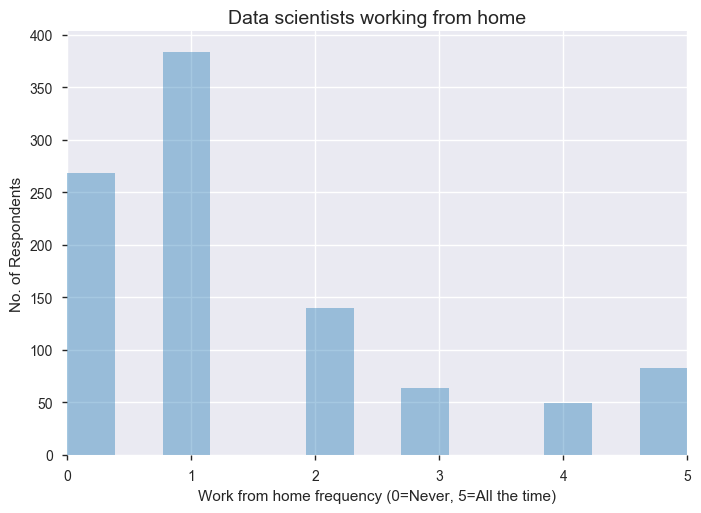

In [186]:
sns.set_color_codes('pastel')

f, ax = plt.subplots()

sns.distplot(ds_home_remote_data['HomeRemoteCode'].dropna(axis=0), kde=False)
ax.set_title('Data scientists working from home', fontsize=14)
ax.set_ylabel('No. of Respondents')
ax.set_xlabel('Work from home frequency (0=Never, 5=All the time)')
ax.set_xlim(0, 5)

plt.show()
# Why aren't the bars centered?

#### It appears that most data scientists work from home a few days a month or not at all, but there is a reasonable number of data scientists in all categories. If there were only two respondents in cateogry 5, for example, we may want to exclude that category from the analysis. 

In [187]:
js_company_type = ds_data.groupby('CompanyType')['JobSatisfaction'].mean().reset_index().sort_values('JobSatisfaction',
                                                                                                     ascending=False)

js_company_type

,CompanyType,JobSatisfaction
4,Pre-series A startup,7.500000
3,Non-profit/non-governmental organization or pr...,7.243590
0,Government agency or public school/university,7.113043
7,"Sole proprietorship or partnership, not in sta...",7.000000
8,Something else,7.000000
6,Publicly-traded corporation,6.937008
5,"Privately-held limited company, not in startup...",6.891892
10,Venture-funded startup,6.794118
2,I prefer not to answer,6.657143
1,I don't know,6.333333


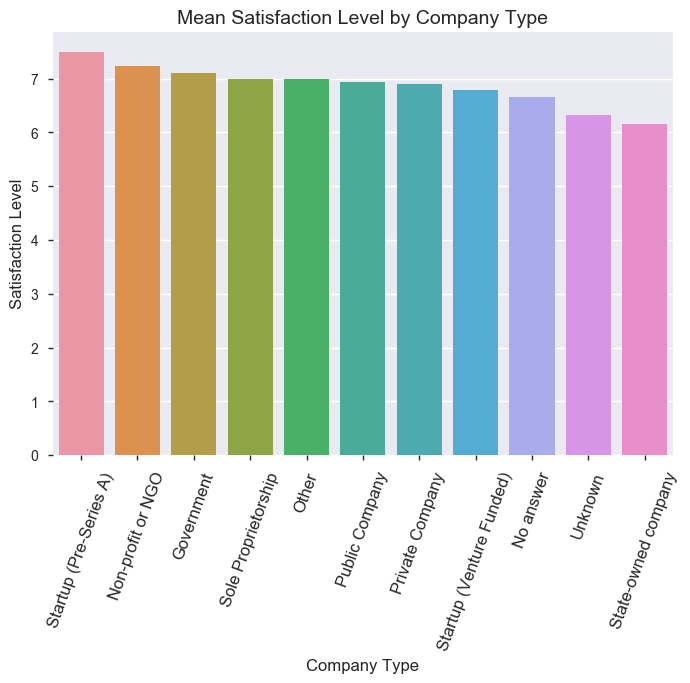

In [188]:
f, ax = plt.subplots()
xlabels = ['Startup (Pre-Series A)', 'Non-profit or NGO', 'Government', 'Sole Proprietorship', 'Other',
          'Public Company', 'Private Company', 'Startup (Venture Funded)', 'No answer', 'Unknown', 
           'State-owned company']

sns.barplot(x=js_company_type['CompanyType'], y=js_company_type['JobSatisfaction'], ax=ax)
ax.set_xlabel('Company Type', fontsize=12)
ax.set_ylabel('Satisfaction Level', fontsize=12)
ax.set_xticklabels(xlabels, rotation=70, fontsize=12)
ax.set_title('Mean Satisfaction Level by Company Type', fontsize=14)
plt.show()

In [189]:
companies = ds_data.groupby('CompanyType')['Professional'].count().reset_index()
companies.columns = ['CompanyType', 'DataScientists']
#companies.set_index('CompanyType', inplace=True)
companies = companies.sort_values('DataScientists', ascending=False)
companies['NonDataScientists'] = None
companies.head()

,CompanyType,DataScientists,NonDataScientists
5,"Privately-held limited company, not in startup...",262,None
0,Government agency or public school/university,231,None
6,Publicly-traded corporation,128,None
3,Non-profit/non-governmental organization or pr...,78,None
1,I don't know,54,None


In [190]:
def company_type_numbers(co_type):
    sort_by_type = non_ds_data[non_ds_data.CompanyType == co_type]
    return len(sort_by_type)
    
companies['NonDataScientists'] = companies['CompanyType'].apply(lambda x: company_type_numbers(x))    

In [191]:
tot_ds = companies['DataScientists'].sum()
tot_nonds = companies['NonDataScientists'].sum()

In [192]:
def fractions(number, total):
    return number/total

In [193]:
companies['DS_Fraction'] = companies['DataScientists'].apply(lambda x: fractions(x, tot_ds))
companies['NonDS_Fraction'] = companies['NonDataScientists'].apply(lambda x: fractions(x, tot_nonds))

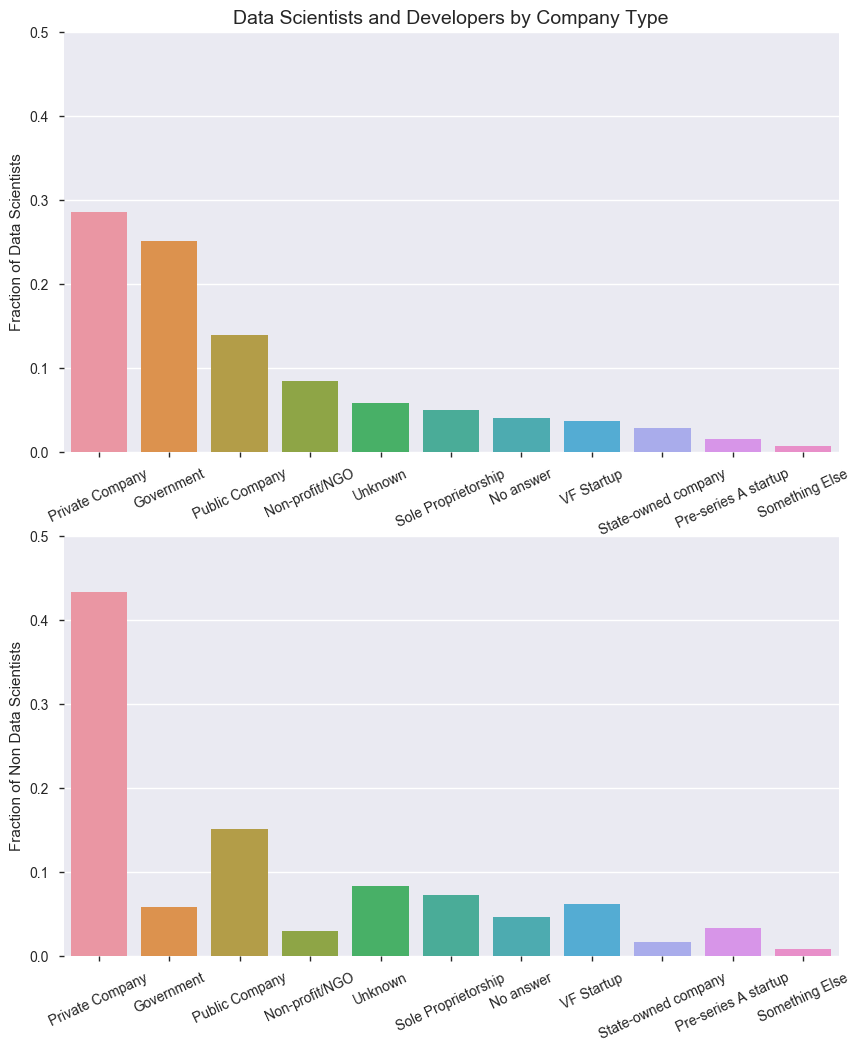

In [194]:
x = ['Private Company', 'Government', 'Public Company', 'Non-profit/NGO', 'Unknown', 'Sole Proprietorship', 'No answer',
            'VF Startup', 'State-owned company', 'Pre-series A startup', 'Something Else']
f, (ax1, ax2) = plt.subplots(2, figsize=(10, 12))
sns.set_color_codes('pastel')

ax1 = sns.barplot(x, y=companies['DS_Fraction'], label='Data Scientists', ax=ax1)
ax1.set_xticklabels(x, rotation=25)
ax1.set_ylabel('Fraction of Data Scientists')
ax1.set_ylim(0, 0.5)
ax1.set_title('Data Scientists and Developers by Company Type', fontsize=14)

ax2 = sns.barplot(x, y=companies['NonDS_Fraction'], label='Non-data Scientists', ax=ax2)
ax2.set_xticklabels(x, rotation=25)
ax2.set_ylabel('Fraction of Non Data Scientists')
ax2.set_ylim(0, 0.5)

plt.show()
# how to get the bars next to each other using seaborn? is this possible?

#### Data scientists are most likely to work in a private company or government while non-data scientists are most likely to work in a private company or public company. Data scientists appear to be more likely to work in a non-profit or NGO compared to non-data scientists while non-data scientists appear to be slightly more likely to work at a startup. Satisfaction levels amoung data scientists are relatively high for all company types; employees at state owned companies seem to be the least satisfied while those at early stage startups (pre-series A) seem to be most satisfied. 

#### After reading an [article](https://hbr.org/2017/08/what-we-learned-about-bureaucracy-from-7000-hbr-readers) about beauracracy in the Harvard Business Review, I wondered if job satisfaction would be affected by company size. Assuming that beauracracy increases with company size, I hypothesized that job satisfaction would decrease with company size. 

In [195]:
co_size_sat = ds_data.groupby('CompanySize')['JobSatisfaction'].mean().reset_index().sort_values('JobSatisfaction',
                                                                                                    ascending=False)

In [196]:
co_size_count = ds_data.groupby('CompanySize')['Professional'].count().reset_index().sort_values('Professional', 
                                                                                                ascending=False)

In [197]:
company_size = pd.merge(co_size_count, co_size_sat, how='inner', on='CompanySize')
company_size

,CompanySize,Professional,JobSatisfaction
0,"10,000 or more employees",176,6.890805
1,20 to 99 employees,155,6.844156
2,100 to 499 employees,150,6.852349
3,"1,000 to 4,999 employees",134,7.030075
4,"5,000 to 9,999 employees",68,6.632353
5,10 to 19 employees,66,7.230769
6,500 to 999 employees,65,7.092308
7,Fewer than 10 employees,51,7.039216
8,I don't know,40,6.875000
9,I prefer not to answer,14,7.461538


In [198]:
c_size = {'10,000 or more employees': 10000, '5,000 to 9,999 employees': 7500, '1,000 to 4,999 employees': 3000, 
          '20 to 99 employees': 60, '100 to 499 employees': 300, '10 to 19 employees': 15, '500 to 999 employees': 750, 
         'Fewer than 10 employees': 5}

def size_of_company(category):
    try:
        return c_size[category]
    except:
        return None

company_size['CompanySizeCode'] = company_size['CompanySize'].apply(lambda x: size_of_company(x))
company_size['LogCompanySize'] = company_size['CompanySizeCode'].apply(lambda x: math.log(x))
company_size.sort_values('CompanySizeCode', ascending=False)
    

,CompanySize,Professional,JobSatisfaction,CompanySizeCode,LogCompanySize
0,"10,000 or more employees",176,6.890805,10000.0,9.210340
4,"5,000 to 9,999 employees",68,6.632353,7500.0,8.922658
3,"1,000 to 4,999 employees",134,7.030075,3000.0,8.006368
6,500 to 999 employees,65,7.092308,750.0,6.620073
2,100 to 499 employees,150,6.852349,300.0,5.703782
1,20 to 99 employees,155,6.844156,60.0,4.094345
5,10 to 19 employees,66,7.230769,15.0,2.708050
7,Fewer than 10 employees,51,7.039216,5.0,1.609438
8,I don't know,40,6.875000,NaN,NaN
9,I prefer not to answer,14,7.461538,NaN,NaN


(0, 10)

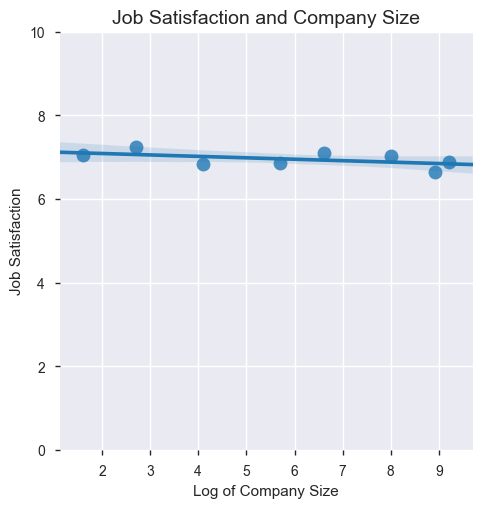

In [199]:
sns.lmplot('LogCompanySize', 'JobSatisfaction', data=company_size.dropna(),
          scatter_kws={"marker":"D", "s": 100})
plt.title('Job Satisfaction and Company Size', fontsize=14)
plt.xlabel('Log of Company Size')
plt.ylabel('Job Satisfaction')
plt.ylim(0,10)

#### Although job satisfaction appears to decrease slightly with increasing company size, it doesn't appear to have a large effect as the downward trend is barely visible. However, it would be a good idea to test this hypothesis in a later analysis. The null hypothesis would be that the slope of the line is 0, while the alternative hypothesis would be that the slope of the line is negative. 

#### Finally let's examine education level of data scientists and whether education level impacts career satisfaction.

In [200]:
education = ds_data.groupby('FormalEducation')[['CareerSatisfaction', 'JobSatisfaction']].mean().reset_index()
education = education.sort_values('CareerSatisfaction', ascending=False)
education

,FormalEducation,CareerSatisfaction,JobSatisfaction
6,Professional degree,7.785714,6.785714
1,Doctoral degree,7.521212,7.341772
4,Master's degree,7.173267,6.971129
7,Secondary school,6.945946,6.303030
0,Bachelor's degree,6.944272,6.693069
8,Some college/university study without earning ...,6.677686,6.531532
3,I prefer not to answer,6.615385,8.000000
2,I never completed any formal education,5.900000,7.000000
5,Primary/elementary school,4.500000,5.000000


In [201]:
education_count = ds_data.groupby('FormalEducation')['Professional'].count().reset_index().sort_values('Professional', 
                                                                                                       ascending=False)
education_count.columns = [['FormalEducation', 'NumberOfDataScientists']]
education_count = education_count[education_count.NumberOfDataScientists >= 10]
education_count

,FormalEducation,NumberOfDataScientists
4,Master's degree,406
0,Bachelor's degree,330
1,Doctoral degree,165
8,Some college/university study without earning ...,122
7,Secondary school,37
3,I prefer not to answer,14
6,Professional degree,14
2,I never completed any formal education,10


In [202]:
total = education_count['NumberOfDataScientists'].sum()

def fractions(number, total):
    return number/total

education_count['Fraction'] = education_count['NumberOfDataScientists'].apply(lambda x: fractions(x, total))

education_count

,FormalEducation,NumberOfDataScientists,Fraction
4,Master's degree,406,0.369763
0,Bachelor's degree,330,0.300546
1,Doctoral degree,165,0.150273
8,Some college/university study without earning ...,122,0.111111
7,Secondary school,37,0.033698
3,I prefer not to answer,14,0.012750
6,Professional degree,14,0.012750
2,I never completed any formal education,10,0.009107


In [203]:
education_merged = pd.merge(education_count, education, how='inner', on='FormalEducation')
education_merged

,FormalEducation,NumberOfDataScientists,Fraction,CareerSatisfaction,JobSatisfaction
0,Master's degree,406,0.369763,7.173267,6.971129
1,Bachelor's degree,330,0.300546,6.944272,6.693069
2,Doctoral degree,165,0.150273,7.521212,7.341772
3,Some college/university study without earning ...,122,0.111111,6.677686,6.531532
4,Secondary school,37,0.033698,6.945946,6.303030
5,I prefer not to answer,14,0.012750,6.615385,8.000000
6,Professional degree,14,0.012750,7.785714,6.785714
7,I never completed any formal education,10,0.009107,5.900000,7.000000


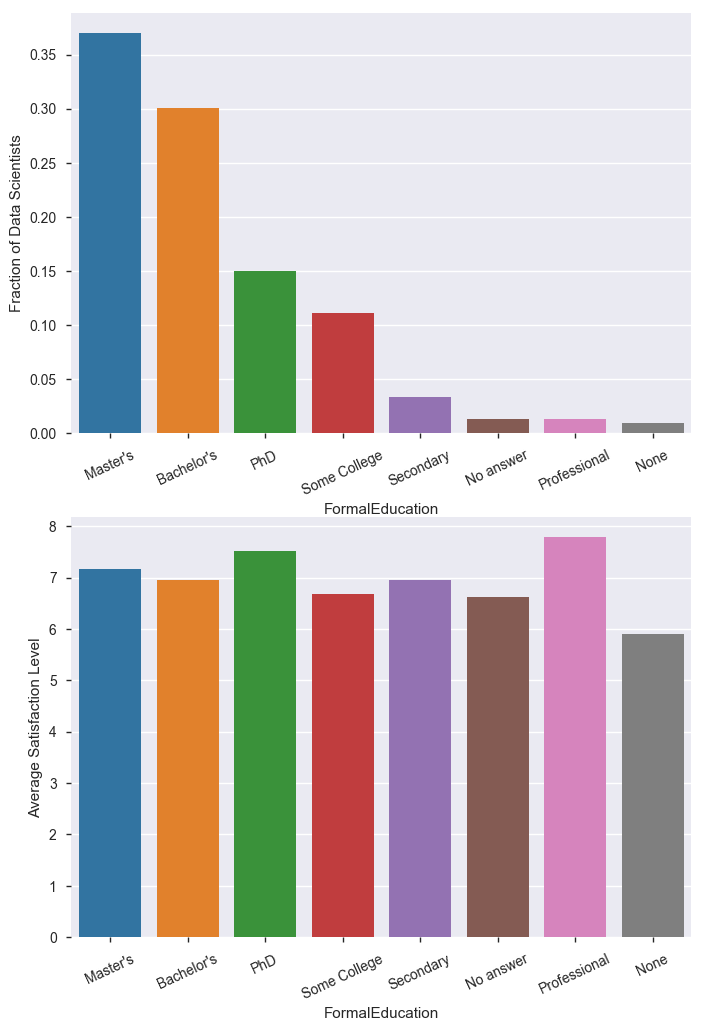

In [204]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,12))
sns.set_color_codes('pastel')
x_labels = ["Master's", "Bachelor's", "PhD", "Some College", "Secondary", "No answer", "Professional", "None", 
            "Primary"]

ax1 = sns.barplot(x=education_merged['FormalEducation'], y=education_merged['Fraction'], ax=ax1)
ax1.set_xticklabels(x_labels, rotation=25)
ax1.set_ylabel('Fraction of Data Scientists')

ax2 = sns.barplot(x=education_merged['FormalEducation'], y=education_merged['CareerSatisfaction'], ax=ax2)
ax2.set_xticklabels(x_labels, rotation=25)
ax2.set_ylabel('Average Satisfaction Level')

plt.show()

In [205]:
# how to add confidence intervals to these bar graphs?

#### Data scientists are a highly educatied bunch - the largest fraction have a master's degree and over half have at least a bachelor's degree. Those with more education seem to be slightly more satisfied in their careers while those with no formal education seem to be least satisfied. 

In [206]:
ds_data['FormalEducation'].unique()

array(['Doctoral degree', "Master's degree",
       "Some college/university study without earning a bachelor's degree",
       'Secondary school', "Bachelor's degree",
       'I never completed any formal education', 'Professional degree',
       'I prefer not to answer', 'Primary/elementary school'], dtype=object)

In [207]:
ed_level = {'Doctoral degree': 6, "Professional degree": 6, "Master's degree": 5, 
            "Bachelor's degree": 4, 
            "Some college/university study without earning a bachelor's degree": 3, 
            'Secondary school': 2, 'Primary/elementary school': 1, 
            'I never completed any formal education': 0, 'I prefer not to answer': None}

def education_level(a_string):
    try:
        return ed_level[a_string]
    except:
        return None

education_merged['EducationLevel'] = education_merged['FormalEducation'].apply(lambda x: education_level(x))
education_merged.sort_values('EducationLevel', ascending=False)

,FormalEducation,NumberOfDataScientists,Fraction,CareerSatisfaction,JobSatisfaction,EducationLevel
2,Doctoral degree,165,0.150273,7.521212,7.341772,6.0
6,Professional degree,14,0.012750,7.785714,6.785714,6.0
0,Master's degree,406,0.369763,7.173267,6.971129,5.0
1,Bachelor's degree,330,0.300546,6.944272,6.693069,4.0
3,Some college/university study without earning ...,122,0.111111,6.677686,6.531532,3.0
4,Secondary school,37,0.033698,6.945946,6.303030,2.0
7,I never completed any formal education,10,0.009107,5.900000,7.000000,0.0
5,I prefer not to answer,14,0.012750,6.615385,8.000000,NaN


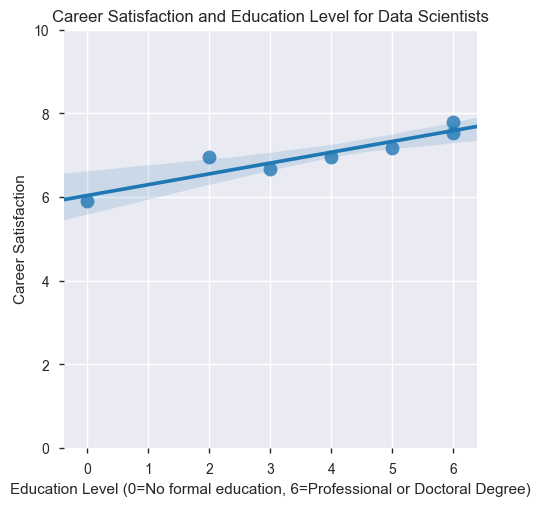

In [208]:
sns.lmplot('EducationLevel', 'CareerSatisfaction', data=education_merged.dropna(), 
           scatter_kws={'marker':'D', 's': 100})
plt.title("Career Satisfaction and Education Level for Data Scientists")
plt.xlabel('Education Level (0=No formal education, 6=Professional or Doctoral Degree)')
plt.ylabel('Career Satisfaction')
plt.ylim(0,10)
plt.show()

#### Again it appears there is an upward trend with career satisfaction and education level. In a later analysis we should test the hypothesis that the slope of this line is greater than zero. 